In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dtale

# importing datasets

In [5]:
ds = pd.read_csv('Data.csv')
ds

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [29]:
x =df.iloc[:,:-1].values
y =df.iloc[:,-1].values

# for find Missing values and Data preprocessing used visualization like heatmap ,correlation etc

<AxesSubplot:>

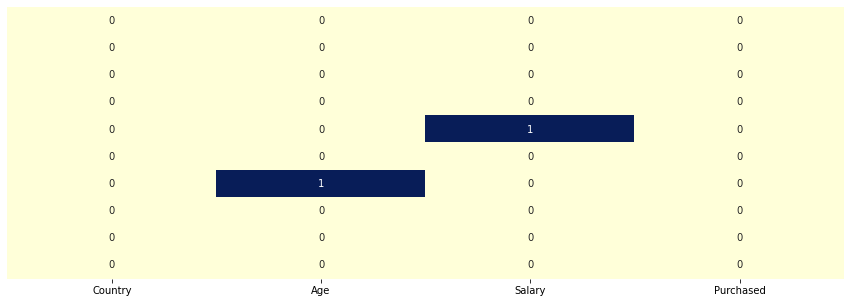

In [19]:
plt.figure(figsize =(15,5))
sns.heatmap(df.isnull(),annot=True,yticklabels =False,cbar=False,cmap ='YlGnBu')

For checking duplicates  and drop duplicates , false means no duplicates and True means duplicates present

In [106]:
ds.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [107]:
ds.drop_duplicates(inplace =True)

# Handling numeric missing values method:-
1.Delete rows and colimns
2.create separate model by classification algorithms
3.Best methods Imputing missing values by Mean,Median ,mode 


In [36]:
from sklearn.impute import SimpleImputer  #fill on place of strategy =mean,median,most_frequent
import numpy as np
sm = SimpleImputer(missing_values=np.NaN,strategy = 'most_frequent',fill_value =False)
sm.fit_transform(x[:,1:3])

array([[44.0, 72000.0],
       [27.0, 48000.0],
       [30.0, 54000.0],
       [38.0, 61000.0],
       [40.0, 48000.0],
       [35.0, 58000.0],
       [27.0, 52000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [37.0, 67000.0]], dtype=object)

# Label and one hot encoder for handle categorical values

# Encoding techniques for handle string or categories values
1.Delete rows and columns
2.create separate model by using classifier algorithms
3.Replace most frequent values
4.Apply unsupervised clustering alforithms


# Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
lb = LabelEncoder().fit_transform(x[:,0])

In [39]:
lb  #0=franch, 2 =german,1=spain

array([0, 2, 1, 2, 1, 0, 2, 0, 1, 0])

# OneHotEncoding

In [52]:
from sklearn .preprocessing import OneHotEncoder
import category_encoders as ce

In [70]:
#create dummies variables
ohe = ce.OneHotEncoder(cols='Country', handle_unknown = 'return_nan' , return_df = True, use_cat_names =True)
ohe.fit_transform(df['Country'])


,Country_France,Country_Spain,Country_Germany
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0
6,0.0,1.0,0.0
7,1.0,0.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [60]:
ohe_2 = ce.OneHotEncoder(cols ='Purchased',handle_unknown ='return_nan',return_df =True,use_cat_names =True)
ohe_2.fit_transform(df['Purchased'])

In [61]:
ohe_2

,Purchased_No,Purchased_Yes
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,1.0


# Dummies encoder

In [75]:
dmy = pd.get_dummies(df,drop_first=False)
ds = dmy.fillna(dmy.mean())
ds

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.000000,72000.000000,1,0,0,1,0
1,27.000000,48000.000000,0,0,1,0,1
2,30.000000,54000.000000,0,1,0,1,0
3,38.000000,61000.000000,0,0,1,1,0
4,40.000000,63777.777778,0,1,0,0,1
5,35.000000,58000.000000,1,0,0,0,1
6,38.777778,52000.000000,0,0,1,1,0
7,48.000000,79000.000000,1,0,0,0,1
8,50.000000,83000.000000,0,1,0,1,0
9,37.000000,67000.000000,1,0,0,0,1


# Spliting , train,test data

In [76]:
X =ds.iloc[:,:-2].values
X

array([[4.40000000e+01, 7.20000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.70000000e+01, 4.80000000e+04, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [3.00000000e+01, 5.40000000e+04, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [3.80000000e+01, 6.10000000e+04, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [4.00000000e+01, 6.37777778e+04, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [3.50000000e+01, 5.80000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.87777778e+01, 5.20000000e+04, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00],
       [4.80000000e+01, 7.90000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.00000000e+01, 8.30000000e+04, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00],
       [3.70000000e+01, 6.70000000e+04, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [81]:
Y = ds.iloc[:,5:7].values
Y

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_text = train_test_split(X,Y,test_size =.2,random_state=0)

# Features Scaling

In [83]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_text = ss.fit_transform(x_test)

In [84]:
x_train

array([[ 0.26306757,  0.12381479, -1.        ,  2.64575131, -0.77459667],
       [-0.25350148,  0.46175632,  1.        , -0.37796447, -0.77459667],
       [-1.97539832, -1.53093341, -1.        , -0.37796447,  1.29099445],
       [ 0.05261351, -1.11141978, -1.        , -0.37796447,  1.29099445],
       [ 1.64058505,  1.7202972 ,  1.        , -0.37796447, -0.77459667],
       [-0.0813118 , -0.16751412, -1.        , -0.37796447,  1.29099445],
       [ 0.95182631,  0.98614835,  1.        , -0.37796447, -0.77459667],
       [-0.59788085, -0.48214934,  1.        , -0.37796447, -0.77459667]])

In [85]:
x_test

array([[3.0e+01, 5.4e+04, 0.0e+00, 1.0e+00, 0.0e+00],
       [5.0e+01, 8.3e+04, 0.0e+00, 1.0e+00, 0.0e+00]])

# Applied ML Algorithms

In [99]:
from sklearn.linear_model import LinearRegression as li

In [100]:
Li = li().fit(x_train,y_train)

In [101]:
Li.predict(x_test)

array([[-16345.89128155,  16346.89128155],
       [-25122.36304635,  25123.36304635]])

# Task-2  Handling Multiple/many Categorica Nominal  features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df2 = pd.read_csv('mercedes-Copy1.csv',usecols =['X0','X1','X2','X3','X4','X5','X6','X8'])
df2

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [4]:
df2

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [5]:
df2.info()  #string datatypes is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
 7   X8      4209 non-null   object
dtypes: object(8)
memory usage: 263.2+ KB


In [6]:
df2.isnull().sum()

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X8    0
dtype: int64

In [7]:
 for unic in df2.columns:
        print(unic,':',len(df2[unic].unique()),'labels')

X0 : 47 labels
X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels
X8 : 25 labels


In [8]:
pd.get_dummies(df2,drop_first=True).shape  #187 describe kitne dummies columns aa jayge jab encoding hogi

(4209, 187)

In [9]:
# let find top 10 most frequent categories for variables of any columns
most_frequent = df2.X2.value_counts() # as is repeated 1659 times 
most_frequent

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
h        6
at       6
an       5
q        5
al       5
ah       4
p        4
av       4
au       3
af       1
am       1
aa       1
l        1
o        1
ar       1
j        1
c        1
Name: X2, dtype: int64

In [10]:
# so we take x2 top10 most frequent values
top10 = [x  for x in most_frequent.head(10).index]
top10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [11]:
# now we make 10 binary variables
for label in top10:
    df2[label] = np.where(df2['X2']==label,1,0)
df2[['X2']+top10].head(4209)  # so we are succesfully convert x2 col string into numeric binary datasets


,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4204,as,1,0,0,0,0,0,0,0,0,0
4205,t,0,0,0,0,0,0,0,0,0,0
4206,r,0,0,0,0,0,1,0,0,0,0
4207,e,0,0,0,0,0,0,0,0,0,1


In [12]:
# now we are convert x1 - x8 into numeric binary form 
def one_hot_top_x(df,variables,top_x_labels):
    
    for label in top_x_labels:
        df[variables+'_'+label] =np.where(df2[variables]==label,1,0)
        
df2 = df2 = pd.read_csv('mercedes-Copy1.csv',usecols =['X0','X1','X2','X3','X4','X5','X6','X8'])

one_hot_top_x(df2,'X2',top10)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,k,v,at,a,d,u,j,o,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,d,n,0,0,0,0,0,0,1,0,0,0
5,t,b,e,c,d,g,h,s,0,0,0,0,0,0,0,0,0,1
6,al,r,e,f,d,f,h,s,0,0,0,0,0,0,0,0,0,1
7,o,l,as,f,d,f,j,a,1,0,0,0,0,0,0,0,0,0
8,w,s,as,e,d,f,i,h,1,0,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,0,0,0,0,0,0,0,0


In [13]:
# now for x1 changes
top10_x1 = [x for x in df2.X1.value_counts().head(10).index]
top10_x1

one_hot_top_x(df2,'X1',top10_x1)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,1,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,0,1,0,0,0,0,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,0,0,0,0,0,1,0,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,0,0,0,1,0,0,0,0,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,1,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
df2

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,1,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,1,0,...,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,0,0,0,0,0,0,0,0,1
4206,ak,v,r,a,d,aa,g,e,0,0,...,0,0,0,0,1,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,1,0,0,0,0


In [15]:
top10_x0 = [x for x in df2.X0.value_counts().head(10).index]
top10_x0

one_hot_top_x(df2,'X0',top10_x0)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X0_z,X0_ak,X0_y,X0_ay,X0_t,X0_x,X0_o,X0_f,X0_n,X0_w
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,0,0,0,1,0,0,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,0,0,0,0,0,0,0,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,0,0,0,0,0,0,1,0,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,0,0,0,0,0,0,0,0,1
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
top10_x3 = [x for x in df2.X3.value_counts().head(10).index]

one_hot_top_x(df2,'X3',top10_x3)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X0_f,X0_n,X0_w,X3_c,X3_f,X3_a,X3_d,X3_g,X3_e,X3_b
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,0,1,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,1,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,1,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,1,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,1,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,0,0,1,0,0,0,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,0,0,0,0,1,0,0,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,0,0,0,0,1,0,0,0,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,0,1,0,0,0,0,0,1,0
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
top10_x4 = [x for x in df2.X4.value_counts().head(10).index]

one_hot_top_x(df2,'X4',top10_x4)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X3_f,X3_a,X3_d,X3_g,X3_e,X3_b,X4_d,X4_a,X4_c,X4_b
0,k,v,at,a,d,u,j,o,0,0,...,0,1,0,0,0,0,1,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,1,0,1,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,1,0,0,0,0,0,1,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,1,0,0,0,0,0,1,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,0,0,0,0,0,1,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,1,0,0,0,0,0,1,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,1,0,0,0,0,0,1,0,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,0,0,0,1,0,1,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
top10_x5 = [x for x in df2.X5.value_counts().head(10).index]

one_hot_top_x(df2,'X5',top10_x5)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X5_v,X5_w,X5_q,X5_r,X5_d,X5_s,X5_n,X5_p,X5_m,X5_i
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,0,0,0,0,0,0,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,0,0,0,0,0,0,0,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,0,0,0,0,0,0,0,0,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,0,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
top10_x6 = [x for x in df2.X6.value_counts().head(10).index]
top10_x6

one_hot_top_x(df2,'X6',top10_x6)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X6_g,X6_j,X6_d,X6_i,X6_l,X6_a,X6_h,X6_k,X6_c,X6_b
0,k,v,at,a,d,u,j,o,0,0,...,0,1,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,1,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,1,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,1,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,1,0,0,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,0,0,0,0,0,1,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,0,0,0,0,0,0,1,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,0,1,0,0,0,0,0,0,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,0,0,1,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
top10_x8 = [x for x in df2.X8.value_counts().head(10).index]
top10_x8

one_hot_top_x(df2,'X8',top10_x8)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8,X2_as,X2_ae,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,1,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,1,0,0,0,0,0,0
5,t,b,e,c,d,g,h,s,0,0,...,0,1,0,0,0,0,0,0,0,0
6,al,r,e,f,d,f,h,s,0,0,...,0,1,0,0,0,0,0,0,0,0
7,o,l,as,f,d,f,j,a,1,0,...,0,0,0,0,0,0,0,1,0,0
8,w,s,as,e,d,f,i,h,1,0,...,0,0,0,0,0,0,0,0,0,0
9,j,b,aq,c,d,f,a,e,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
df2.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X2_as', 'X2_ae',
       'X2_ai', 'X2_m', 'X2_ak', 'X2_r', 'X2_n', 'X2_s', 'X2_f', 'X2_e',
       'X1_aa', 'X1_s', 'X1_b', 'X1_l', 'X1_v', 'X1_r', 'X1_i', 'X1_a', 'X1_c',
       'X1_o', 'X0_z', 'X0_ak', 'X0_y', 'X0_ay', 'X0_t', 'X0_x', 'X0_o',
       'X0_f', 'X0_n', 'X0_w', 'X3_c', 'X3_f', 'X3_a', 'X3_d', 'X3_g', 'X3_e',
       'X3_b', 'X4_d', 'X4_a', 'X4_c', 'X4_b', 'X5_v', 'X5_w', 'X5_q', 'X5_r',
       'X5_d', 'X5_s', 'X5_n', 'X5_p', 'X5_m', 'X5_i', 'X6_g', 'X6_j', 'X6_d',
       'X6_i', 'X6_l', 'X6_a', 'X6_h', 'X6_k', 'X6_c', 'X6_b', 'X8_j', 'X8_s',
       'X8_f', 'X8_n', 'X8_i', 'X8_e', 'X8_r', 'X8_a', 'X8_w', 'X8_v'],
      dtype='object')

In [22]:
df3 = df2.drop(columns =['X0','X1','X2','X3','X4','X5','X6','X8'])
df3

,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e,...,X8_j,X8_s,X8_f,X8_n,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4207,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df3.columns

Index(['X2_as', 'X2_ae', 'X2_ai', 'X2_m', 'X2_ak', 'X2_r', 'X2_n', 'X2_s',
       'X2_f', 'X2_e', 'X1_aa', 'X1_s', 'X1_b', 'X1_l', 'X1_v', 'X1_r', 'X1_i',
       'X1_a', 'X1_c', 'X1_o', 'X0_z', 'X0_ak', 'X0_y', 'X0_ay', 'X0_t',
       'X0_x', 'X0_o', 'X0_f', 'X0_n', 'X0_w', 'X3_c', 'X3_f', 'X3_a', 'X3_d',
       'X3_g', 'X3_e', 'X3_b', 'X4_d', 'X4_a', 'X4_c', 'X4_b', 'X5_v', 'X5_w',
       'X5_q', 'X5_r', 'X5_d', 'X5_s', 'X5_n', 'X5_p', 'X5_m', 'X5_i', 'X6_g',
       'X6_j', 'X6_d', 'X6_i', 'X6_l', 'X6_a', 'X6_h', 'X6_k', 'X6_c', 'X6_b',
       'X8_j', 'X8_s', 'X8_f', 'X8_n', 'X8_i', 'X8_e', 'X8_r', 'X8_a', 'X8_w',
       'X8_v'],
      dtype='object')

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X2_as   4209 non-null   int32
 1   X2_ae   4209 non-null   int32
 2   X2_ai   4209 non-null   int32
 3   X2_m    4209 non-null   int32
 4   X2_ak   4209 non-null   int32
 5   X2_r    4209 non-null   int32
 6   X2_n    4209 non-null   int32
 7   X2_s    4209 non-null   int32
 8   X2_f    4209 non-null   int32
 9   X2_e    4209 non-null   int32
 10  X1_aa   4209 non-null   int32
 11  X1_s    4209 non-null   int32
 12  X1_b    4209 non-null   int32
 13  X1_l    4209 non-null   int32
 14  X1_v    4209 non-null   int32
 15  X1_r    4209 non-null   int32
 16  X1_i    4209 non-null   int32
 17  X1_a    4209 non-null   int32
 18  X1_c    4209 non-null   int32
 19  X1_o    4209 non-null   int32
 20  X0_z    4209 non-null   int32
 21  X0_ak   4209 non-null   int32
 22  X0_y    4209 non-null   int32
 23  X0_ay   4209 

### so All string values of X0-X8 columns changes into binary int32 numbers

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df3.isnull(),annot=True,cmap='ocean')

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True)

# 2nd method use to handle multi/many Nominal categorical values

##Count and frequency Encoding is used for handling highly cardinality or many label features .

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
cf = pd.read_csv('mercedes-Copy1.csv',usecols =['X0','X1','X2'])
cf.head(50)

,X0,X1,X2
0,k,v,at
1,k,t,av
2,az,w,n
3,az,t,n
4,az,v,n
5,t,b,e
6,al,r,e
7,o,l,as
8,w,s,as
9,j,b,aq


In [10]:
cf.shape

(4209, 3)

In [11]:
(pd.get_dummies(cf)).shape # increase more numbers of columns when we apply one hot or dummies encoding techniques

(4209, 118)

In [12]:
len(cf['X0'].unique()) # SO PRESENT 47 VARIABLES REPEATED

47

In [13]:
len(cf['X1'].unique())

27

In [14]:
len(cf['X2'].unique())

44

In [15]:
for i in cf.columns[0:]:
    print(i,len(cf[i].unique()),'label')

X0 47 label
X1 27 label
X2 44 label


In [18]:
cf.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
aq     18
am     18
i      18
u      17
aw     16
l      16
ad     14
b      11
k      11
au     11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [24]:
count_frequency = cf.X0.value_counts().to_dict()
count_frequency

{'z': 360,
 'ak': 349,
 'y': 324,
 'ay': 313,
 't': 306,
 'x': 300,
 'o': 269,
 'f': 227,
 'n': 195,
 'w': 182,
 'j': 181,
 'az': 175,
 'aj': 151,
 's': 106,
 'ap': 103,
 'h': 75,
 'd': 73,
 'al': 67,
 'v': 36,
 'af': 35,
 'ai': 34,
 'm': 34,
 'e': 32,
 'ba': 27,
 'at': 25,
 'a': 21,
 'ax': 19,
 'aq': 18,
 'am': 18,
 'i': 18,
 'u': 17,
 'aw': 16,
 'l': 16,
 'ad': 14,
 'b': 11,
 'k': 11,
 'au': 11,
 'r': 10,
 'as': 10,
 'bc': 6,
 'ao': 4,
 'c': 3,
 'q': 2,
 'aa': 2,
 'g': 1,
 'ac': 1,
 'ab': 1}

In [50]:
#apply count frequency methods
cf.X0 = cf.X0.map(count_frequency)
cf.head(20)

,X0,X1,X2
0,11,v,at
1,11,t,av
2,175,w,n
3,175,t,n
4,175,v,n
5,306,b,e
6,67,r,e
7,269,l,as
8,182,s,as
9,181,b,aq


In [51]:
cf.X1 = cf.X1.map(cf.X1.value_counts().to_dict())
cf.head(20)

,X0,X1,X2
0,11,408,at
1,11,31,av
2,175,52,n
3,175,31,n
4,175,408,n
5,306,592,e
6,67,251,e
7,269,590,as
8,182,598,as
9,181,592,aq


In [55]:
cf.X2 = cf.X2.map(cf.X2.value_counts().to_dict())
cf.head(50)

,X0,X1,X2
0,11,408,36
1,11,31,36
2,175,52,137
3,175,31,137
4,175,408,137
5,306,592,81
6,67,251,81
7,269,590,1659
8,182,598,1659
9,181,592,63
